# **Analytics SeneCard** - Implementation of Business Questions

---

ISIS-3510 Construcción de Aplicaciones Móviles

Section 2 Team 21

## **Database Connection and Libraries**

The code authenticates a Python app with Firebase using a service account key **(key.json)** and initializes a connection to Firestore. Then, it creates a Firestore client **(db)** to interact with the database for reading and writing data.

In [ ]:
# Import necessary libraries to manage the information
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Import library of firebase
import firebase_admin
from firebase_admin import credentials, firestore

if not firebase_admin._apps:
    cred = credentials.Certificate('')
    firebase_admin.initialize_app(cred)

db = firestore.client()

# **Business Questions** - Sprint 2

## **Implementation Business Question 1**

*What is the average QR code access time?*

This question is classified as Type 1 because it focuses on summarizing and analyzing existing data to describe a specific metric: the average QR code access time. The significance of this question lies in the fact that if QR code access time is too long, it can frustrate users, resulting in a poor overall experience. In an app where QR codes are integral to functionality, reducing access delays is crucial to maintaining user engagement and satisfaction. A seamless and quick QR scanning process not only improves the app’s usability but also enhances its appeal, directly contributing to the app’s success. This importance is further underscored by the fact that the QR code is essential for the app's core functionality, allowing the businessOwner to access uniandesMember information instantly by scanning the code.

To address this question, we collect data each time a uniandesMember accesses the QR code view. This data includes the date of the QR code access, the access time in milliseconds, and the uniandesMember's ID. This information is then stored in a Firebase collection named "analyticsBusinessQuestion1" for further analysis.

After saving this information, we retrieve it from Firebase and use a pandas DataFrame to manage and process the records.

In [ ]:
# Instance of collection analytics business question 1
coleccion_analitics_business_question_1 = db.collection('AnalyticsBusinessQuestions').document('sprint2').collection('businessQuestion1')

# List of documents from the collection
docs = list(coleccion_analitics_business_question_1.stream())

# Transforme from firebase collection to pandas dataframe
data_df_analytics_business_question_1 = []
for doc in docs:
    data_dict_df_analytics_business_question_1 = doc.to_dict()
    data_dict_df_analytics_business_question_1['document_id'] = doc.id
    data_df_analytics_business_question_1.append(data_dict_df_analytics_business_question_1)

df_analytics_business_question_1 = pd.DataFrame(data_df_analytics_business_question_1)
df_analytics_business_question_1.head()

,uniandesMemberId,accessTime,document_id
0,TekL68dg4S5UIGfiZt1K,3000,JWlFhAnmHJ5lJRO7U9PQ
1,TekL68dg4S5UIGfiZt1K,306,P0jBtxTHO1C9fn6rHwgV
2,TekL68dg4S5UIGfiZt1K,4500,QdH7jBxGZWL4QXXSse20
3,TekL68dg4S5UIGfiZt1K,4451,RapXhdPX2lS6x5B8PDmQ
4,TekL68dg4S5UIGfiZt1K,2500,dkrI7MI0YU49yNGC7QyY


Next, we transform the data to calculate the minimum, maximum, and average QR code access times. These statistics, along with the distribution of access times, are then visualized in a plot.

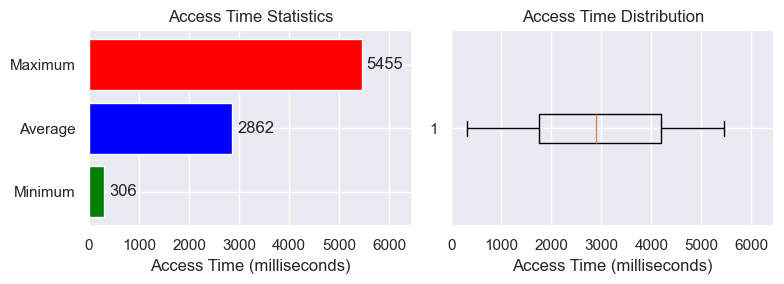

In [ ]:
# Calculate statistics
min_time = df_analytics_business_question_1['accessTime'].min()
max_time = df_analytics_business_question_1['accessTime'].max()
mean_time = df_analytics_business_question_1['accessTime'].mean()

# Graph the results
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 3))

# Horizontal bar chart (minimum, average, maximum)
bars = axes[0].barh(['Minimum', 'Average', 'Maximum'], [min_time, mean_time, max_time], color=['green', 'blue', 'red'])
for bar in bars:
    axes[0].text(bar.get_width() + 100, bar.get_y() + bar.get_height()/2, f'{bar.get_width():.0f}', va='center')
axes[0].set_xlim(0, max_time + 1000)
axes[0].set_xlabel('Access Time (milliseconds)')
axes[0].set_title('Access Time Statistics')

# Box and whisker plot
axes[1].boxplot(df_analytics_business_question_1['accessTime'], vert=False)
axes[1].set_xlim(0, max_time + 1000)
axes[1].set_xlabel('Access Time (milliseconds)')
axes[1].set_title('Access Time Distribution')

# Show plots
plt.tight_layout()
plt.show()

## **Implementation Business Question 2**

*What are the most and the least consulted stores in the app?*


In [ ]:
import pandas as pd

stores_analytics_ref = db.collection('storesAnalytics')
docs_analytics = stores_analytics_ref.stream()

stores_ref = db.collection('stores')
docs_stores = stores_ref.stream()

store_name_mapping = {}

for doc in docs_stores:
    store_data = doc.to_dict()
    store_name_mapping[doc.id] = store_data.get('name', 'Unknown Store')

store_analytics_data = []
unknown_store_count = 0

for doc in docs_analytics:
    analytics_data = doc.to_dict()
    store_id = analytics_data.get('store_id')
    times_visited = analytics_data.get('timesVisitedLastFiveDays', 0)  # Default to 0 if field is missing

    store_name = store_name_mapping.get(store_id, 'Unknown Store')

    if store_name == 'Unknown Store':
        unknown_store_count += 1
        store_name = f'Unknown Store {unknown_store_count}'

    store_analytics_data.append({
        'store_id': store_id,
        'store_name': store_name,
        'timesVisitedLastFiveDays': times_visited
    })

df_store_analytics = pd.DataFrame(store_analytics_data)
df_store_analytics.head()

,store_id,store_name,timesVisitedLastFiveDays
0,wO7VkiBRzigpY5bvTfzp,Unknown Store 1,18
1,EmjDoJdCztWy8rZaacwZ,Unknown Store 2,13
2,LrupjtaDhefpTlSo28Oq,Hornitos,13
3,JLLPCvGOlzJ7dpr6D4oV,Mac Donalds,20
4,umSX5VklT2fZc1If9euj,Wendy's,6


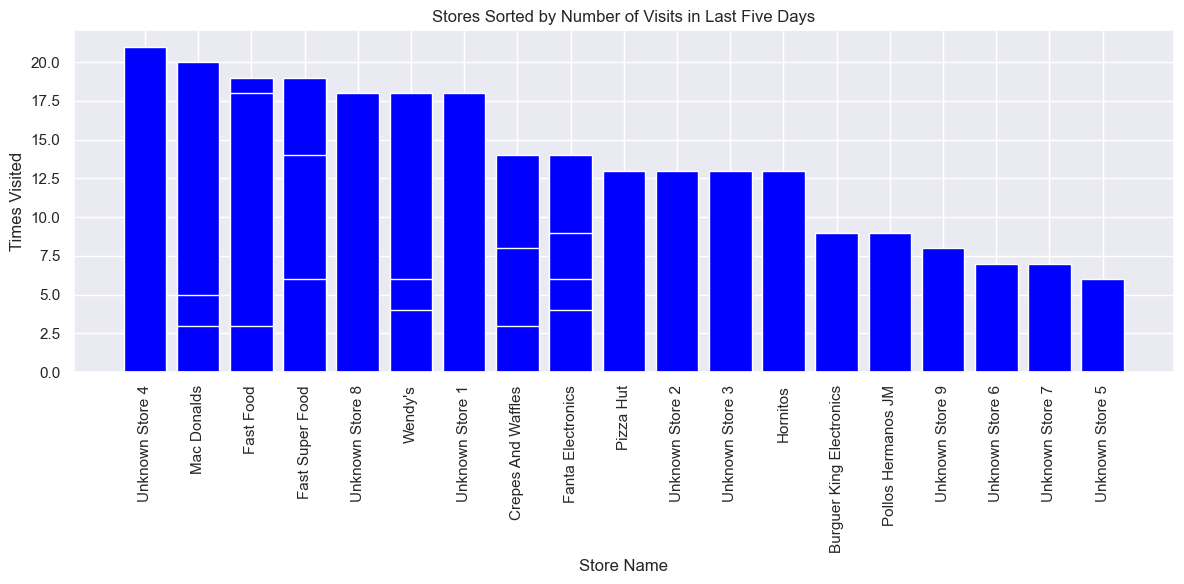

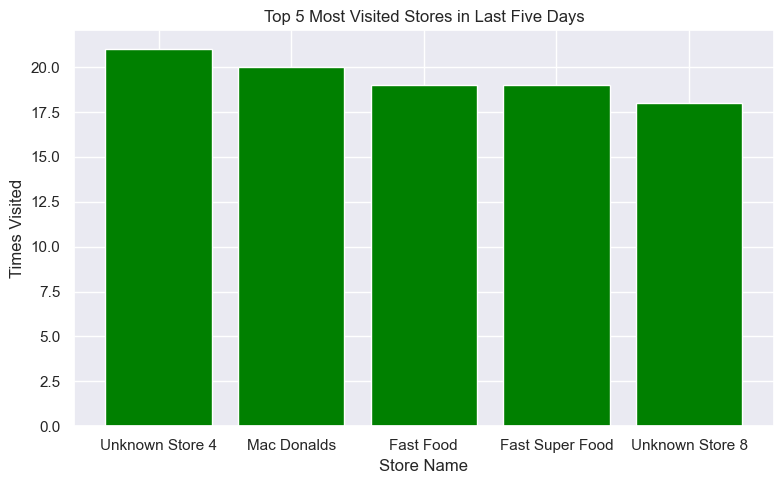

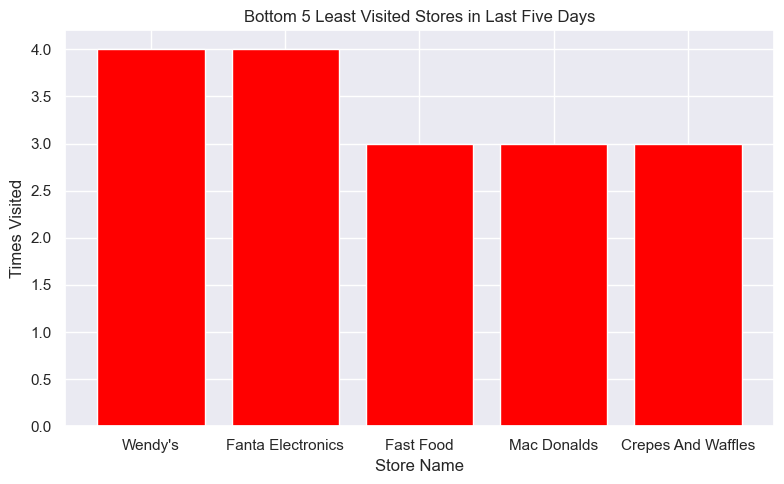

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

df_stores_sorted = df_store_analytics.sort_values(by='timesVisitedLastFiveDays', ascending=False)

plt.figure(figsize=(12, 6))
plt.bar(df_stores_sorted['store_name'], df_stores_sorted['timesVisitedLastFiveDays'], color='blue')
plt.xticks(rotation=90)
plt.title('Stores Sorted by Number of Visits in Last Five Days')
plt.xlabel('Store Name')
plt.ylabel('Times Visited')
plt.tight_layout()
plt.show()

N = 5

df_top_n = df_stores_sorted.head(N)
plt.figure(figsize=(8, 5))
plt.bar(df_top_n['store_name'], df_top_n['timesVisitedLastFiveDays'], color='green')
plt.title(f'Top {N} Most Visited Stores in Last Five Days')
plt.xlabel('Store Name')
plt.ylabel('Times Visited')
plt.tight_layout()
plt.show()

df_bottom_n = df_stores_sorted.tail(N)
plt.figure(figsize=(8, 5))
plt.bar(df_bottom_n['store_name'], df_bottom_n['timesVisitedLastFiveDays'], color='red')
plt.title(f'Bottom {N} Least Visited Stores in Last Five Days')
plt.xlabel('Store Name')
plt.ylabel('Times Visited')
plt.tight_layout()
plt.show()


## **Implementation Business Question 4**

*What is the distribution of clicked advertisements and which are the most clicked?*

In [ ]:
coleccion_analitics_business_question_4 = db.collection('AnalyticsBusinessQuestions').document('sprint2').collection('businessQuestion4')

docs = coleccion_analitics_business_question_4.stream()

coleccion_anuncios = db.collection('advertisements')
anuncios_docs = coleccion_anuncios.stream()

advertisement_names = {ad.id: ad.to_dict().get('title', 'Unknown') for ad in anuncios_docs}

datos = []
for doc in docs:
    data = doc.to_dict()
    advertisement_id = data.get('advertisementId')
    advertisement_name = advertisement_names.get(advertisement_id, 'Unknown')

    datos.append({
        'Advertisement ID': advertisement_id,
        'Advertisement Name': advertisement_name,
        'timesClicked': data.get('clicks', 0)
    })

df = pd.DataFrame(datos)
df.head()

,Advertisement ID,Advertisement Name,timesClicked
0,2AewV3d1A3L6SGIsXna3,Cumpleaños en Casa,2
1,D9YhCwfDUMB0nxo1a9Uy,ponque,2
2,LgJTfAtnOdVfwsOKOETx,Jueves Chocolate Santandereano,7
3,aeYhxDmNkrbjyfYAxKhY,jodaui2,10
4,n7lUkKdgo4pwrrN3Cq39,Promocion Fast Super Food,3


/var/folders/h1/vg70z43j17l85vx5zg5wb28h0000gn/T/ipykernel_33110/2502584873.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='timesClicked', y='Advertisement Name', data=top_clicked_ads, palette="viridis")


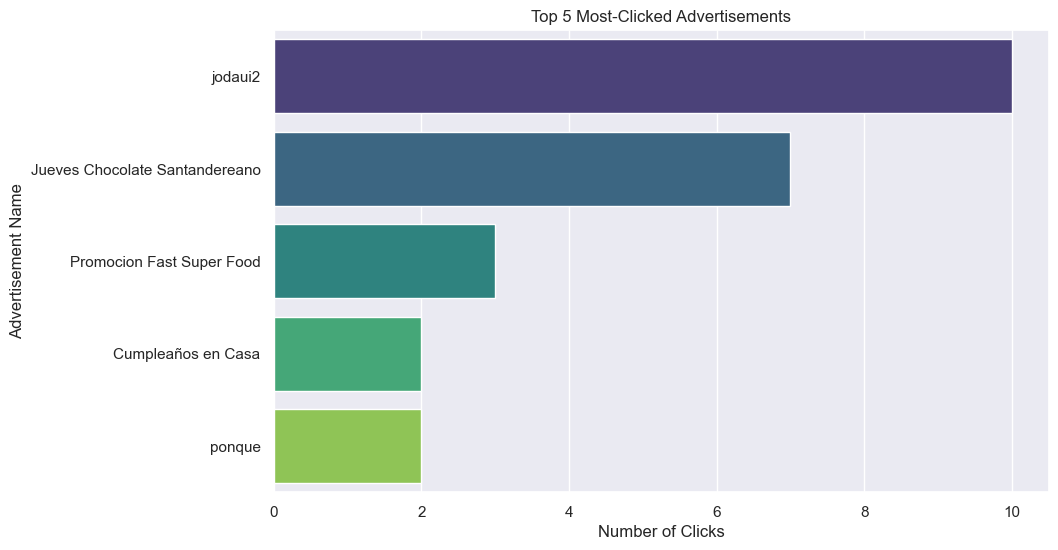

/var/folders/h1/vg70z43j17l85vx5zg5wb28h0000gn/T/ipykernel_33110/2502584873.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='timesClicked', y='Advertisement Name', data=df.sort_values('timesClicked', ascending=False), palette="coolwarm")


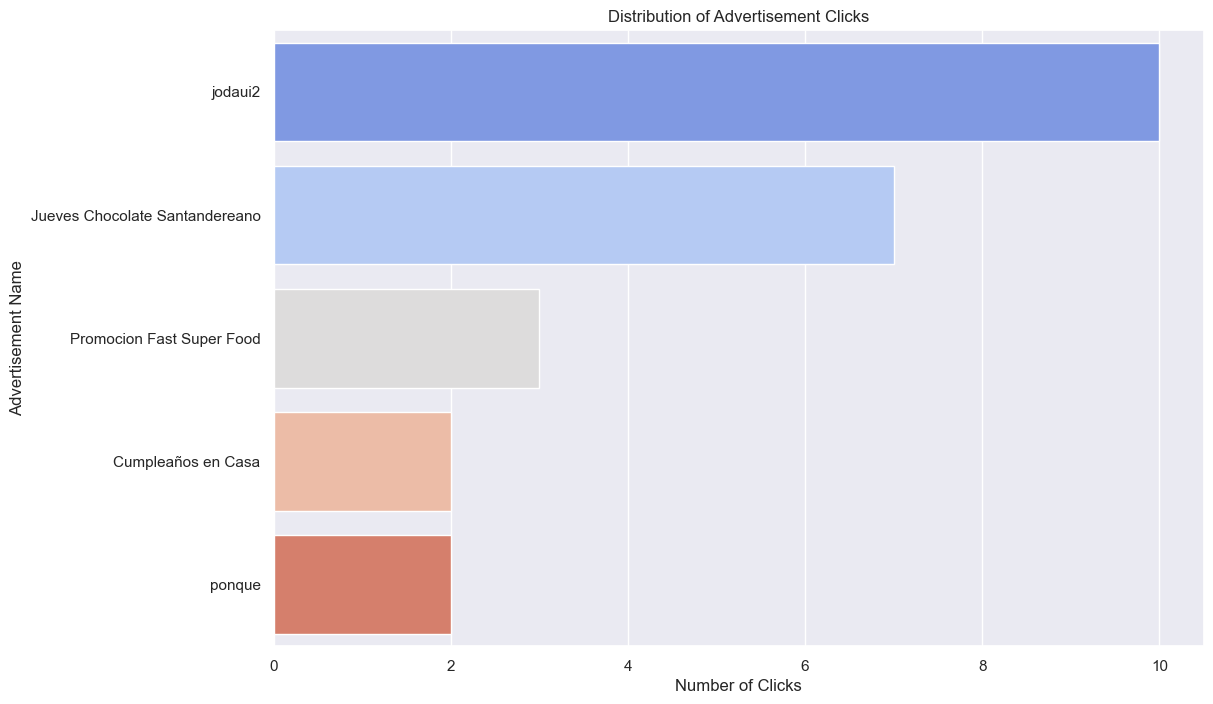

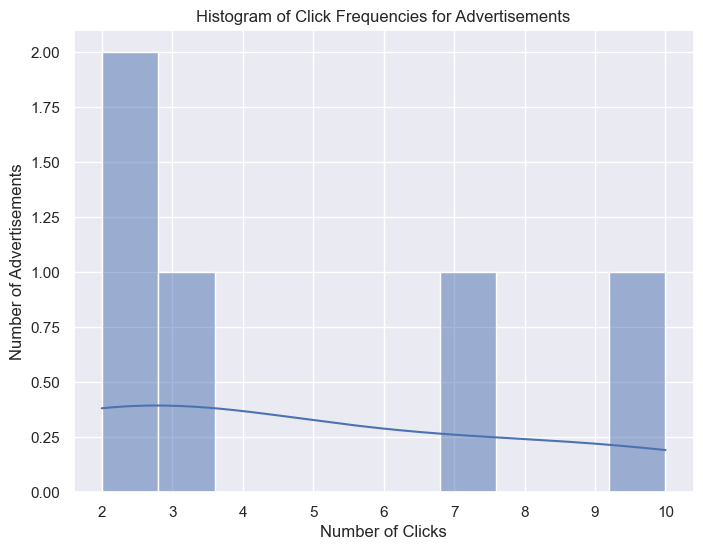

Summary Statistics for Advertisement Clicks:
count     5.000000
mean      4.800000
std       3.563706
min       2.000000
25%       2.000000
50%       3.000000
75%       7.000000
max      10.000000
Name: timesClicked, dtype: float64


In [ ]:
import seaborn as sns

# Set up for clean, readable plots
sns.set(style='darkgrid')

# 1. Top 5 Most-Clicked Advertisements
top_clicked_ads = df.nlargest(5, 'timesClicked')
plt.figure(figsize=(10, 6))
sns.barplot(x='timesClicked', y='Advertisement Name', data=top_clicked_ads, palette="viridis")
plt.title('Top 5 Most-Clicked Advertisements')
plt.xlabel('Number of Clicks')
plt.ylabel('Advertisement Name')
plt.show()

# 2. Distribution of Advertisement Clicks (all ads)
plt.figure(figsize=(12, 8))
sns.barplot(x='timesClicked', y='Advertisement Name', data=df.sort_values('timesClicked', ascending=False), palette="coolwarm")
plt.title('Distribution of Advertisement Clicks')
plt.xlabel('Number of Clicks')
plt.ylabel('Advertisement Name')
plt.show()

# 3. Click Frequency Histogram
plt.figure(figsize=(8, 6))
sns.histplot(df['timesClicked'], bins=10, kde=True)
plt.title('Histogram of Click Frequencies for Advertisements')
plt.xlabel('Number of Clicks')
plt.ylabel('Number of Advertisements')
plt.show()

# 4. Summary Statistics for Clicks
click_summary = df['timesClicked'].describe()
print("Summary Statistics for Advertisement Clicks:")
print(click_summary)

## **Implementation Business Question 5**

*Which are the schedules of opening and closing of the stores of the app?*

In [ ]:
schedule_data = {
    'Monday_Open': [],
    'Monday_Close': [],
    'Tuesday_Open': [],
    'Tuesday_Close': [],
    'Wednesday_Open': [],
    'Wednesday_Close': [],
    'Thursday_Open': [],
    'Thursday_Close': [],
    'Friday_Open': [],
    'Friday_Close': [],
    'Saturday_Open': [],
    'Saturday_Close': [],
    'Sunday_Open': [],
    'Sunday_Close': []
}

# Populate the dictionary with schedule data
for schedule in df_stores['Schedule']:
    for day in ['monday', 'tuesday', 'wednesday', 'thursday', 'friday', 'saturday', 'sunday']:
        day_cap = day.capitalize()
        times = schedule.get(day, [0, 0])
        if isinstance(times, list) and len(times) == 2:
            schedule_data[f'{day_cap}_Open'].append(times[0])
            schedule_data[f'{day_cap}_Close'].append(times[1])
        else:
            # Handle cases where schedule data is missing or malformed
            schedule_data[f'{day_cap}_Open'].append(0)
            schedule_data[f'{day_cap}_Close'].append(0)

# Convert the dictionary to a DataFrame
df_schedule = pd.DataFrame(schedule_data)

print("Schedule data prepared for box plot.")


NameError: name 'df_stores' is not defined

In [ ]:
# Set the plot style for better aesthetics

# Define the figure size
plt.figure(figsize=(14, 8))

# Prepare data for box plot
# We'll plot opening and closing times separately for each day
boxplot_data = []
labels = []

for day in ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']:
    boxplot_data.append(df_schedule[f'{day}_Open'])
    labels.append(f'{day} Open')
    boxplot_data.append(df_schedule[f'{day}_Close'])
    labels.append(f'{day} Close')

plt.boxplot(boxplot_data, labels=labels, patch_artist=True,
            boxprops=dict(facecolor='lightblue', color='blue'),
            medianprops=dict(color='red'),
            whiskerprops=dict(color='blue'),
            capprops=dict(color='blue'),
            flierprops=dict(color='blue', markeredgecolor='blue'))

plt.title('Box Plot of Store Schedules')
plt.xlabel('Day and Time')
plt.ylabel('Hour of the Day')

plt.xticks(rotation=45)

plt.tight_layout()

plt.show()

NameError: name 'df_schedule' is not defined

<Figure size 1400x800 with 0 Axes>

## **Implementation Business Question 6**

*Which are the stores have the best ranking in the app and which is the distribution of the store ranking?*

The analysis provides crucial insigths that can significantly impact business decisions and overall strategy. Here is why the analysis is important:

**Individual Store Performance**
- By calculating average ratings for each store, businesses can benchmark indiviual store performance against the overall average.
- Knowing the top-rated stores allows businesses to identify best practices that can be replicated.
- Identifying stores with lower ratings helps focus improvement efforts where they are most needed.
- The overall average rating across all stores provides a quick snapshot of general customer satisfaction.

**Category Insights.**
- Average ratings by category help businesses understand which types of products or services are resonating most with customers.
- This information can guide decisions about which categories to expand, maintain, or potentially phase out.
- Companies can allocate more resources (e.g., marketing, staff training) to categories that show promise or need improvement.

In [ ]:
#Reference to the 'stores' collection
stores_collection = db.collection('stores')

#fetch all documents
stores_docs = stores_collection.stream()

#Initialize lists to store data
store_id = []
store_name = []
store_category = []

for doc in stores_docs:
    data = doc.to_dict()
    store_id.append(doc.id)
    store_name.append(data.get('name', 'N/A'))
    store_category.append(data.get('category', 'N/A'))

df_stores = pd.DataFrame({
    'store_id':store_id,
    'name': store_name,
    'category': store_category
})

print(df_stores)


                store_id                      name     category
0   4LD570o5Hx2JcNxcFZI2             la fedetienda  restaurante
1   5qfYpJ66eLew9CvDmTEB         Fanta Electronics   Electronic
2   BKUTExZM9h34f8ZSQeEa        Crepes And Waffles     Bakeries
3   CAwmeUPRAZY2CSWkl43i                 Fast Food   Restaurant
4   INYWkEteDhsxeTVJeUSA  Burguer King Electronics   Electronic
5   JLLPCvGOlzJ7dpr6D4oV               Mac Donalds   Restaurant
6   LrupjtaDhefpTlSo28Oq                  Hornitos       Coffee
7   NUvGyqmC9ZcDU32OX5zR                Juan Store        Other
8   QunPgGPLzoetk3rNmiL3        la tienda de julio    papeleria
9   YpF7EltJCwyTd06cQzmA              felipe store       Coffee
10  bgsYXfOUTzSgRsYoIXvc           Fast Super Food          Bar
11  eDzZQmc5ju7kjP6HImvk                   el mono    papeleria
12  olNh6XZeAVdRxgEHawJV        Pollos Hermanos JM   Restaurant
13  umSX5VklT2fZc1If9euj                   Wendy's   Stationery
14  v7k19yvii87S9c3f2T50                

In [ ]:
# Reference to the 'storesAnalytics' collection
collection_ref = db.collection('storesAnalytics')

# Fetch all documents
docs = collection_ref.stream()

# Initialize lists to store data
store_ids_2 = []
store_ratings = []

for doc in docs:
    data = doc.to_dict()
    store_ids_2.append(data.get('store_id', 'N/A'))
    store_ratings.append(data.get('rating', 0))

# Create a DataFrame
df_stores_analytics = pd.DataFrame({
    'store_id': store_ids_2,
    'rating': store_ratings,
})

print(df_stores_analytics)


                store_id  rating
0   wO7VkiBRzigpY5bvTfzp       4
1   EmjDoJdCztWy8rZaacwZ       3
2   LrupjtaDhefpTlSo28Oq       2
3   JLLPCvGOlzJ7dpr6D4oV       3
4   umSX5VklT2fZc1If9euj       4
5   vpMbEwQvJ5SBjnzU1TGf       2
6   v7k19yvii87S9c3f2T50       5
7   EmjDoJdCztWy8rZaacwZ       4
8   bgsYXfOUTzSgRsYoIXvc       0
9   EmjDoJdCztWy8rZaacwZ       5
10  5qfYpJ66eLew9CvDmTEB       2
11  bgsYXfOUTzSgRsYoIXvc       3
12  CAwmeUPRAZY2CSWkl43i       2
13  CAwmeUPRAZY2CSWkl43i       3
14  olNh6XZeAVdRxgEHawJV       5
15  JLLPCvGOlzJ7dpr6D4oV       2
16  5qfYpJ66eLew9CvDmTEB       4
17  EmjDoJdCztWy8rZaacwZ       4
18  BKUTExZM9h34f8ZSQeEa       5
19  umSX5VklT2fZc1If9euj       3
20  bgsYXfOUTzSgRsYoIXvc       1
21  INYWkEteDhsxeTVJeUSA       3
22  5qfYpJ66eLew9CvDmTEB       3
23  wO7VkiBRzigpY5bvTfzp       4
24  JLLPCvGOlzJ7dpr6D4oV       4
25  BKUTExZM9h34f8ZSQeEa       3
26  umSX5VklT2fZc1If9euj       3
27  BKUTExZM9h34f8ZSQeEa       2
28  xHoTnTpEcWklpxCmbBiU       5
29  vpMbEw

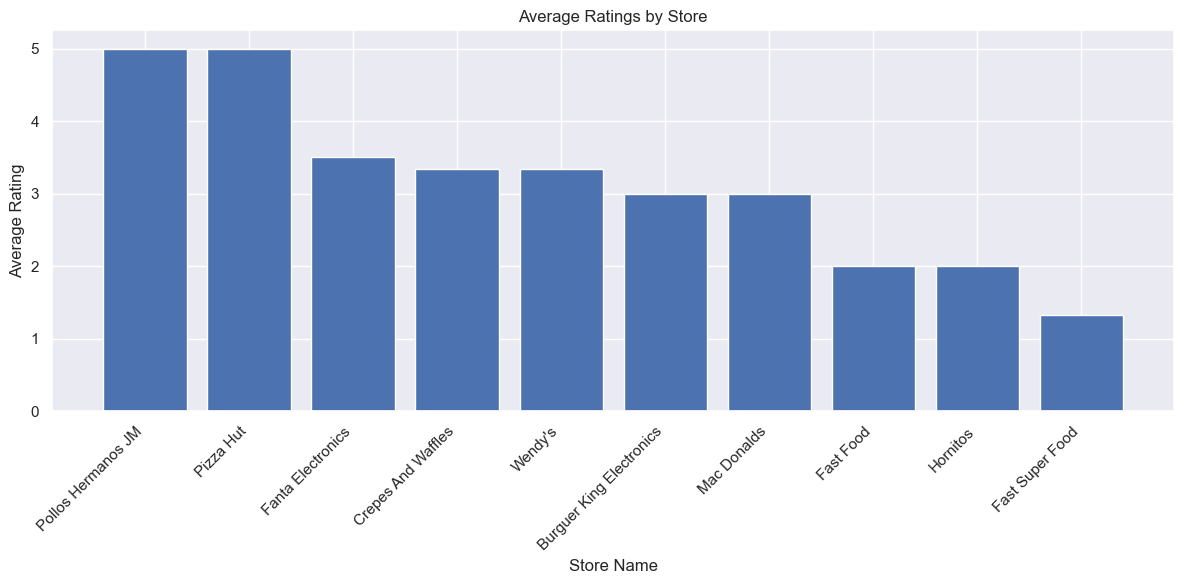


The overall average rating for all stores is: 3.15

Store Ratings:
                       name    rating
7        Pollos Hermanos JM  5.000000
9                 Pizza Hut  5.000000
0         Fanta Electronics  3.500000
1        Crepes And Waffles  3.333333
8                   Wendy's  3.333333
3  Burguer King Electronics  3.000000
4               Mac Donalds  3.000000
2                 Fast Food  2.000000
5                  Hornitos  2.000000
6           Fast Super Food  1.333333

Top 5 stores with the best average rating:
                 name    rating
7  Pollos Hermanos JM  5.000000
9           Pizza Hut  5.000000
0   Fanta Electronics  3.500000
1  Crepes And Waffles  3.333333
8             Wendy's  3.333333

Top 5 stores with the worst average rating:
                       name    rating
3  Burguer King Electronics  3.000000
4               Mac Donalds  3.000000
2                 Fast Food  2.000000
5                  Hornitos  2.000000
6           Fast Super Food  1.333333

Upda

In [ ]:
# Calculate the average rating per store in df_stores_analytics
df_avg_ratings = df_stores_analytics.groupby('store_id')['rating'].mean().reset_index()

# Combine with df_stores to get the store names
df_combined = pd.merge(df_stores, df_avg_ratings, on='store_id')

# Sort by average rating in descending order
df_combined = df_combined.sort_values('rating', ascending=False)

# Create bar chart
plt.figure(figsize=(12, 6))
plt.bar(df_combined['name'], df_combined['rating'])
plt.title('Average Ratings by Store')
plt.xlabel('Store Name')
plt.ylabel('Average Rating')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Calculate and display the overall average
overall_average = df_combined['rating'].mean()
print(f"\nThe overall average rating for all stores is: {overall_average:.2f}")

# Display table with results
print("\nStore Ratings:")
print(df_combined[['name', 'rating']])

# Top 5 stores with best and worst average rating
print("\nTop 5 stores with the best average rating:")
print(df_combined[['name', 'rating']].head())

print("\nTop 5 stores with the worst average rating:")
print(df_combined[['name', 'rating']].tail())

# Update ratings in the 'stores' collection in Firebase
def update_store_ratings(df):
    batch = db.batch()
    for _, row in df.iterrows():
        store_ref = stores_collection.document(row['store_id'])
        batch.update(store_ref, {'rating': row['rating']})

    # Execute the batch update
    batch.commit()
    print(f"\nUpdated ratings for {len(df)} stores in Firebase.")

# Call the function to update the ratings
update_store_ratings(df_combined)



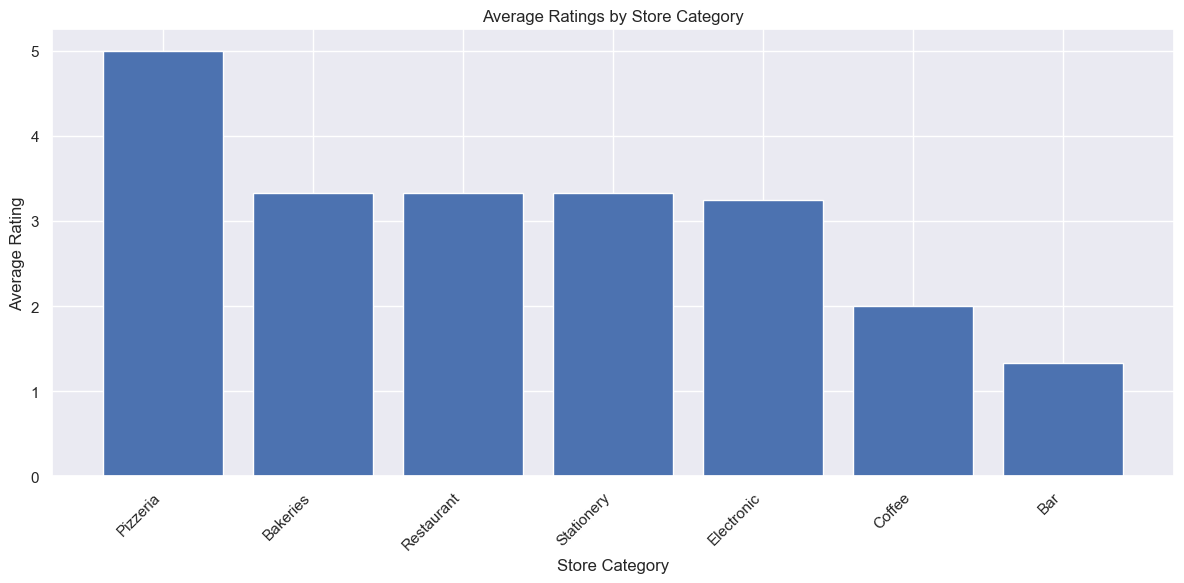

Average ratings by store category:
     category    rating
4    Pizzeria  5.000000
0    Bakeries  3.333333
5  Restaurant  3.333333
6  Stationery  3.333333
3  Electronic  3.250000
2      Coffee  2.000000
1         Bar  1.333333

The overall average rating for all categories is: 3.08

Top 3 categories with the best average rating:
     category    rating
4    Pizzeria  5.000000
0    Bakeries  3.333333
5  Restaurant  3.333333

Bottom 3 categories with the worst average rating:
     category    rating
3  Electronic  3.250000
2      Coffee  2.000000
1         Bar  1.333333


<Figure size 1400x600 with 0 Axes>

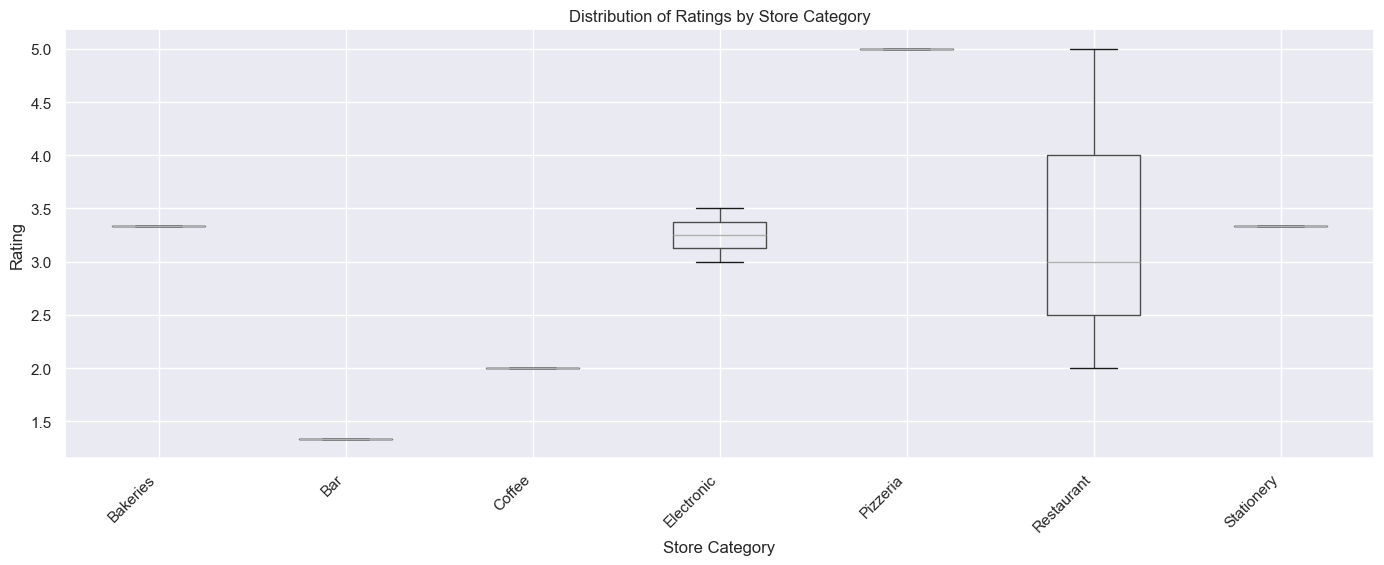

In [ ]:
# Calculate average rating per store in df_stores_analytics
df_avg_ratings = df_stores_analytics.groupby('store_id')['rating'].mean().reset_index()

# Combine with df_stores to get store names and categories
df_combined = pd.merge(df_stores, df_avg_ratings, on='store_id')

# Calculate average rating by category
df_category_ratings = df_combined.groupby('category')['rating'].mean().reset_index()
df_category_ratings = df_category_ratings.sort_values('rating', ascending=False)

# Create bar chart for average ratings by category
plt.figure(figsize=(12, 6))
plt.bar(df_category_ratings['category'], df_category_ratings['rating'])
plt.title('Average Ratings by Store Category')
plt.xlabel('Store Category')
plt.ylabel('Average Rating')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Display table with results by category
print("Average ratings by store category:")
print(df_category_ratings)

# Calculate and display the overall average
overall_average = df_category_ratings['rating'].mean()
print(f"\nThe overall average rating for all categories is: {overall_average:.2f}")

# Additional analysis: Top 3 and Bottom 3 categories
print("\nTop 3 categories with the best average rating:")
print(df_category_ratings.head(3))

print("\nBottom 3 categories with the worst average rating:")
print(df_category_ratings.tail(3))

# Boxplot to show rating distribution by category
plt.figure(figsize=(14, 6))
df_combined.boxplot(column='rating', by='category', figsize=(14, 6))
plt.title('Distribution of Ratings by Store Category')
plt.suptitle('')  # This removes the automatic suptitle added by pandas
plt.xlabel('Store Category')
plt.ylabel('Rating')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# **Business Questions** - Sprint 3

## **Implementation Business Question JEFFERSON**

*What is the average number of effective app entries triggered by notifications of new discounts and promotions?*

This question is classified as Type 3 because it focuses on analyzing how often users open the app after receiving a notification about new discounts or promotions, we can understand how well these notifications capture users' attention and prompt them to interact with the app. A high average could indicate that notifications are well-targeted and relevant, motivating users to explore deals and engage with the app regularly. Conversely, a low average might suggest the need for more personalized or compelling notifications to enhance their impact and increase user retention.

Each time a new discount is added, users who have interacted with that store are notified. We track the number of notifications sent and the number of subsequent app entries. This data is stored, creating a record for each advertisement with its corresponding notification count and effective entry count.

After saving this information, we retrieve it from Firebase and use a pandas DataFrame to manage and process the records.

In [2]:
# Instance of collection analytics business question 1
coleccion_analitics_business_question_3 = db.collection('AnalyticsBusinessQuestions').document('sprint3').collection('businessQuestion3')

# List of documents from the collection
docs = list(coleccion_analitics_business_question_3.stream())

# Transforme from firebase collection to pandas dataframe
data_df_analytics_business_question_3 = []
for doc in docs:
    data_dict_df_analytics_business_question_3 = doc.to_dict()
    data_dict_df_analytics_business_question_3['document_id'] = doc.id
    data_df_analytics_business_question_3.append(data_dict_df_analytics_business_question_3)

df_analytics_business_question_3 = pd.DataFrame(data_df_analytics_business_question_3)
df_analytics_business_question_3.head()

,notifications,advertisementId,entries,document_id
0,8,n7lUkKdgo4pwrrN3Cq39,3,3bA5QF65y4QcJHjmphnO
1,20,2AewV3d1A3L6SGIsXna3,5,CFGLw7jkZIYnvwAvQ6Z5
2,10,LgJTfAtnOdVfwsOKOETx,8,f8417uvZH5ZJd1ssOIqw


Next, we transform the data to calculate the minimum, maximum, and average of conversion rate. These statistics, along with the distribution of conversion rate, are then visualized in a plot.

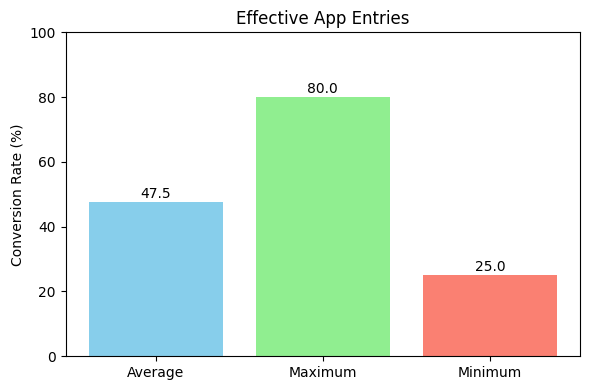

In [3]:
# Calculate the average, maximum, and minimum conversion rate
df_analytics_business_question_3['conversion_rate'] = (df_analytics_business_question_3['entries'] / df_analytics_business_question_3['notifications']) * 100
conversion_avg = df_analytics_business_question_3['conversion_rate'].mean()
conversion_max = df_analytics_business_question_3['conversion_rate'].max()
conversion_min = df_analytics_business_question_3['conversion_rate'].min()

# Create a new DataFrame for the summary plot
summary_data = {
    'Metric': ['Average', 'Maximum', 'Minimum'],
    'Conversion Rate (%)': [conversion_avg, conversion_max, conversion_min]
}
df_summary = pd.DataFrame(summary_data)

# Plot the average, maximum, and minimum conversion rates
plt.figure(figsize=(6, 4))
bars = plt.bar(df_summary['Metric'], df_summary['Conversion Rate (%)'], color=['skyblue', 'lightgreen', 'salmon'])
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.5, round(yval, 2), ha='center', va='bottom')
plt.ylabel("Conversion Rate (%)")
plt.ylim(0, 100)
plt.title("Effective App Entries")
plt.tight_layout()
plt.show()

## **Implementation Business Question JUAN FELIPE**

*What is the average number of people who shop in the stores on each day of the week?*

## **Implementation Business Question ALEJANDRO**

*What are the most popular loyalty programs among users?*

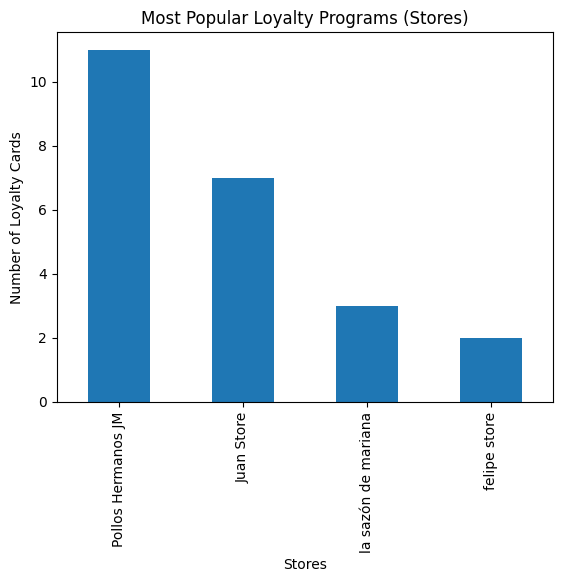

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

loyalty_cards = db.collection('loyaltyCards').stream()
loyalty_data = [{'storeId': card.to_dict()['storeId']} for card in loyalty_cards]

loyalty_df = pd.DataFrame(loyalty_data)

store_ids = loyalty_df['storeId'].unique()
stores_data = []

for store_id in store_ids:
    store_doc = db.collection('stores').document(store_id).get()
    if store_doc.exists:
        store_data = store_doc.to_dict()
        store_data['storeId'] = store_id
        stores_data.append(store_data)

stores_df = pd.DataFrame(stores_data)

merged_df = pd.merge(loyalty_df, stores_df[['storeId', 'name']], on='storeId', how='left')

popularity_count = merged_df['name'].value_counts()
popularity_count.plot(kind='bar', title="Most Popular Loyalty Programs (Stores)", xlabel="Stores", ylabel="Number of Loyalty Cards")
plt.show()



## **Implementation Business Question JULIAN**

*What is the average QR code access time?*

The team determined that the maximum time in which the qr code can be generated (accessed) is a maximum of 100 ms.

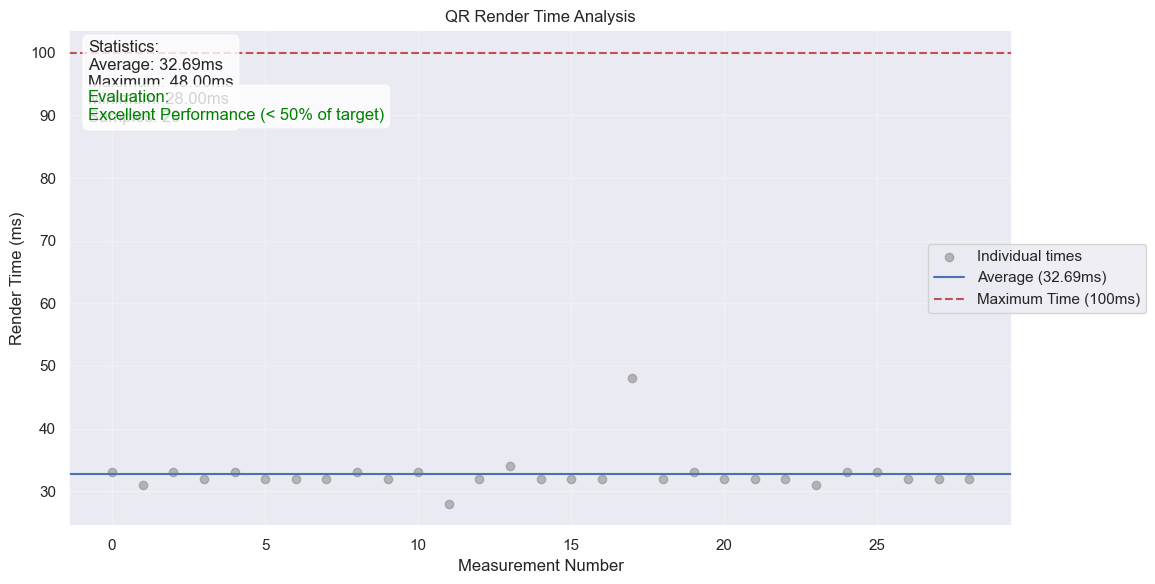


Detailed QR Render Time Summary
Total number of measurements: 29
Average time: 32.69ms
Maximum time: 48.00ms
Minimum time: 28.00ms
Standard deviation: 3.12ms
Median: 32.00ms

Time distribution:
count    29.000000
mean     32.689655
std       3.117960
min      28.000000
25%      32.000000
50%      32.000000
75%      33.000000
max      48.000000
Name: render_time, dtype: float64

Measurements over target (100ms): 0 (0.0%)


In [ ]:
# Get data from Firestore
qr_times_ref = db.collection('AnalyticsBusinessQuestions/sprint2/businessQuestionQR')
docs = qr_times_ref.stream()

# Convert data to list
render_times = []
user_ids = []

for doc in docs:
    data = doc.to_dict()
    render_times.append(data.get('qr_rtime', 0))  # Use 0 as fallback
    user_ids.append(data.get('userId', 'unknown'))

# Create DataFrame
df = pd.DataFrame({
    'user_id': user_ids,
    'render_time': render_times
})

# Calculate statistics
average_time = df['render_time'].mean()
max_time = df['render_time'].max()
min_time = df['render_time'].min()
target_time = 100  # Target time in ms

# Create visualization with adjusted size
plt.figure(figsize=(12, 6))

# Individual render time points
plt.scatter(range(len(render_times)), render_times, alpha=0.5, color='gray', label='Individual times')

# Average time line plot
plt.axhline(y=average_time, color='b', linestyle='-', label=f'Average ({average_time:.2f}ms)')

# Target time line
plt.axhline(y=target_time, color='r', linestyle='--', label=f'Maximum Time (100ms)')

# Graph customization
plt.title('QR Render Time Analysis')
plt.xlabel('Measurement Number')
plt.ylabel('Render Time (ms)')
plt.grid(True, alpha=0.3)

# Move legend to lower right to avoid overlap
plt.legend(bbox_to_anchor=(1.15, 0.5), loc='center right')

# Add statistics text - moved slightly to avoid overlap
stats_text = f'Statistics:\n' \
             f'Average: {average_time:.2f}ms\n' \
             f'Maximum: {max_time:.2f}ms\n' \
             f'Minimum: {min_time:.2f}ms\n' \
             f'Samples: {len(render_times)}'

plt.text(0.02, 0.98, stats_text,
         transform=plt.gca().transAxes,
         verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

# Rate performance - adjusted position
performance_ratio = average_time / target_time
if performance_ratio <= 0.5:
    performance_text = "Excellent Performance (< 50% of target)"
    color = 'green'
elif performance_ratio <= 0.75:
    performance_text = "Good Performance (< 75% of target)"
    color = 'blue'
elif performance_ratio <= 1:
    performance_text = "Acceptable Performance (< 100% of target)"
    color = 'orange'
else:
    performance_text = "Unsatisfactory Performance (> 100% of target)"
    color = 'red'

plt.text(0.02, 0.82,
         f'Evaluation:\n{performance_text}',
         transform=plt.gca().transAxes,
         color=color,
         bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

# Adjust layout to prevent overlap
plt.tight_layout()

# Add padding to the right for the legend
plt.subplots_adjust(right=0.85)

plt.show()

# Print detailed summary
print("\nDetailed QR Render Time Summary")
print("=" * 50)
print(f"Total number of measurements: {len(render_times)}")
print(f"Average time: {average_time:.2f}ms")
print(f"Maximum time: {max_time:.2f}ms")
print(f"Minimum time: {min_time:.2f}ms")
print(f"Standard deviation: {df['render_time'].std():.2f}ms")
print(f"Median: {df['render_time'].median():.2f}ms")
print("\nTime distribution:")
print(df['render_time'].describe())

# Target compliance analysis
over_target = df[df['render_time'] > target_time]
print(f"\nMeasurements over target ({target_time}ms): {len(over_target)} ({(len(over_target)/len(render_times))*100:.1f}%)")

## **Implementation Business Question ANDRES GARCIA**


This code snippet performs data analysis on a Firestore collection named card_analytics. It retrieves documents from the collection and extracts the 'tipo' field from each document, appending it to a list called types. The list is then converted into a Pandas DataFrame, with a column labeled 'Type'.

Next, the code calculates the frequency of each coupon type by counting occurrences of each unique type in the DataFrame. It then prints the frequency of each coupon type to the console.

Finally, the code creates a bar chart to visualize the frequency of the different coupon types. The chart is configured with a sky-blue color scheme and labeled axes for clarity, displaying the results in a graphical format.

This summary captures the key functionalities and outcomes of the code in a concise manner.


Frequency of each coupon type:
Type
Salud              20
Belleza            18
Viajes             18
Entretenimiento    15
Comida             14
Electrónica        14
Vestuario          11
Hogar              10
Name: count, dtype: int64


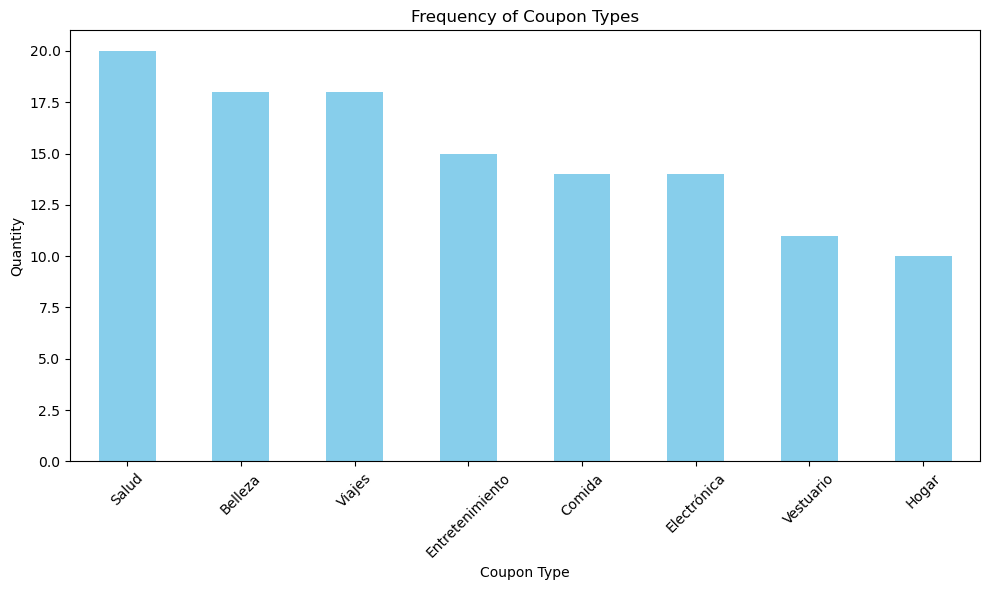

In [ ]:
# Define the collection
collection_name = 'card_analytics'

docs = db.collection(collection_name).stream()

types = []
for doc in docs:
    data = doc.to_dict()
    types.append(data.get('tipo', 'Unknown'))

df = pd.DataFrame(types, columns=['Type'])

type_frequency = df['Type'].value_counts()

print("\nFrequency of each coupon type:")
print(type_frequency)

# Create a bar chart
plt.figure(figsize=(10, 6))
type_frequency.plot(kind='bar', color='skyblue')
plt.title('Frequency of Coupon Types')
plt.xlabel('Coupon Type')
plt.ylabel('Quantity')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## *Implementation Business Question Sprint 3 Juan Serrano*


The business question, "What is the average number of people who shop in the stores on each day of the week?" focuses on understanding customer behavior patterns for different stores. This information is valuable for businesses, especially restaurants, as it enables them to predict peak days and times, helping reduce waste and optimize inventory. By providing insights into customer trends, we can encourage business owners to maintain their presence on the platform, benefiting from data-driven decision-making.

To answer this question, we will first collect all purchases made during the last week from the Firestore database. Each purchase record contains a reference to a loyalty card. Using this reference, we will retrieve the corresponding loyalty card to identify the associated store. Once the store information is obtained, we will extract relevant data such as the store name and category. This data will be used to calculate the average number of customers per store for each day of the week. The results will then be visualized through the following graphs:

Distribution of Purchases of Last Week: This graph will display the total purchases made on each day of the week across all stores.
Distribution of Purchases by Store Category: A breakdown of purchases based on store categories (e.g., Restaurant) for the last week.
Top 5 Businesses of Each Day: A ranked visualization of the top-performing businesses by the number of purchases for each day of the week.
These graphs will provide actionable insights for businesses, enabling them to optimize their operations based on customer behavior trends.

In [8]:
import datetime
# Retrieve purchases made in the last week

end_date = datetime.date.today()
start_date = end_date - datetime.timedelta(days=7)

purchases_ref = db.collection('purchases') 
purchases_query = purchases_ref.where('date', '>=', str(start_date)).where('date', '<=', str(end_date))
purchases_docs = purchases_query.stream()

purchases = []
for doc in purchases_docs:
    purchase_data = doc.to_dict()
    purchases.append({
        'date': purchase_data['date'],
        'loyaltyCardId': purchase_data['loyaltyCardId'],
    })



C:\Users\Master\AppData\Local\Temp\ipykernel_2868\1304846308.py:8: UserWarning: Detected filter using positional arguments. Prefer using the 'filter' keyword argument instead.
  purchases_query = purchases_ref.where('date', '>=', str(start_date)).where('date', '<=', str(end_date))


In [9]:
# Get loyalty cards and map them to stores
loyalty_cards = {}
for purchase in purchases:
    loyalty_card_id = purchase['loyaltyCardId']
    if loyalty_card_id not in loyalty_cards:
        loyalty_card_doc = db.collection('loyaltyCards').document(loyalty_card_id).get()
        if loyalty_card_doc.exists:
            loyalty_card_data = loyalty_card_doc.to_dict()
            loyalty_cards[loyalty_card_id] = {
                'storeId': loyalty_card_data['storeId']
            }

In [10]:
# Get store information
stores = {}
for loyalty_card in loyalty_cards.values():
    store_id = loyalty_card['storeId']
    if store_id not in stores:
        store_doc = db.collection('stores').document(store_id).get()
        if store_doc.exists:
            store_data = store_doc.to_dict()
            stores[store_id] = {
                'name': store_data['name'],
                'category': store_data['category']
            }

In [11]:
# Process data to calculate insights

daywise_purchases = {day: [] for day in range(7)}  
category_purchases = {}
top_businesses_per_day = {day: {} for day in range(7)}

for purchase in purchases:
    date = datetime.datetime.strptime(purchase['date'], "%Y-%m-%d")
    day_of_week = date.weekday()
    loyalty_card_id = purchase['loyaltyCardId']
    
    if loyalty_card_id not in loyalty_cards:
        print(f"Warning: Loyalty card ID {loyalty_card_id} not found in Firestore. Skipping this purchase.")
        continue
    
    store_id = loyalty_cards[loyalty_card_id]['storeId']
    
    if store_id not in stores:
        print(f"Warning: Store ID {store_id} not found in Firestore. Skipping this purchase.")
        continue

    store_info = stores[store_id]

    daywise_purchases[day_of_week].append(store_id)

    category = store_info['category']
    if category not in category_purchases:
        category_purchases[category] = 0
    category_purchases[category] += 1

    if store_id not in top_businesses_per_day[day_of_week]:
        top_businesses_per_day[day_of_week][store_id] = 0
    top_businesses_per_day[day_of_week][store_id] += 1

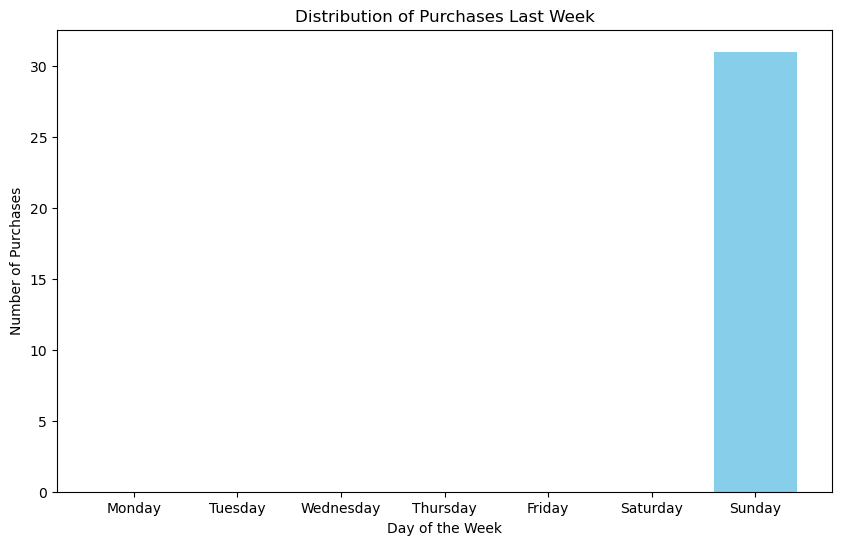

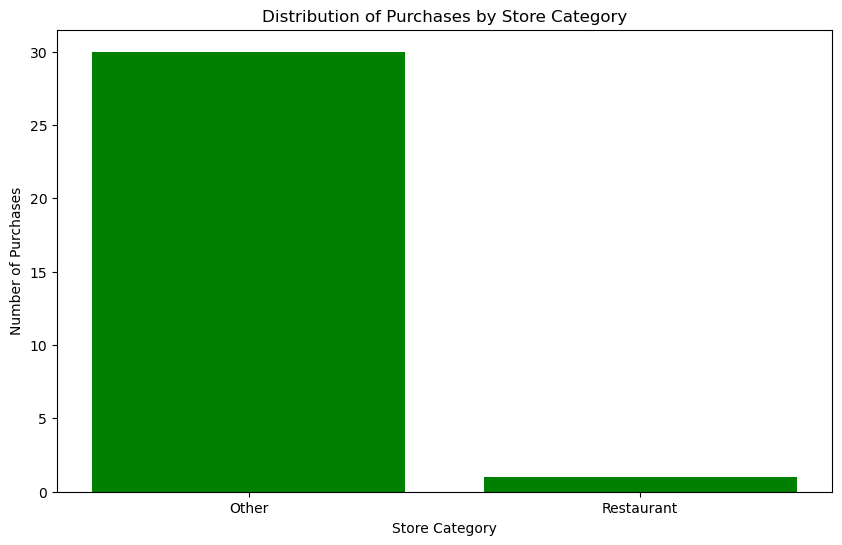

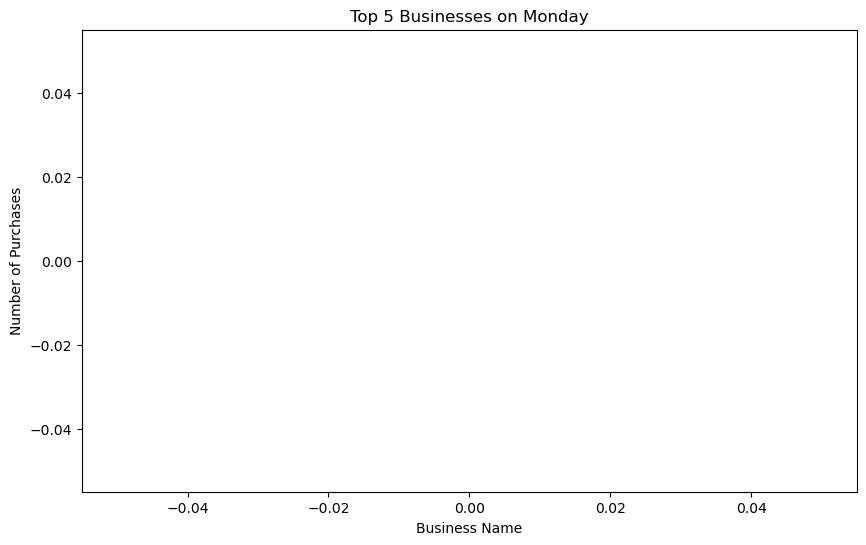

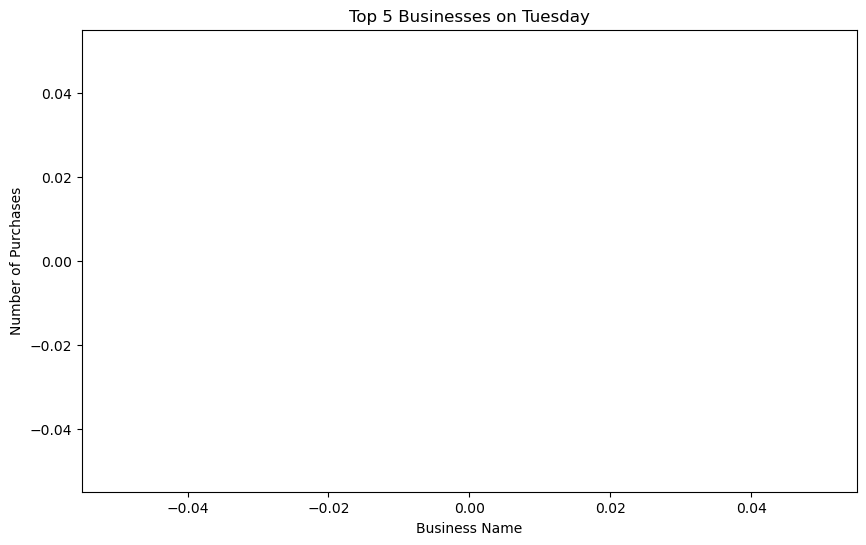

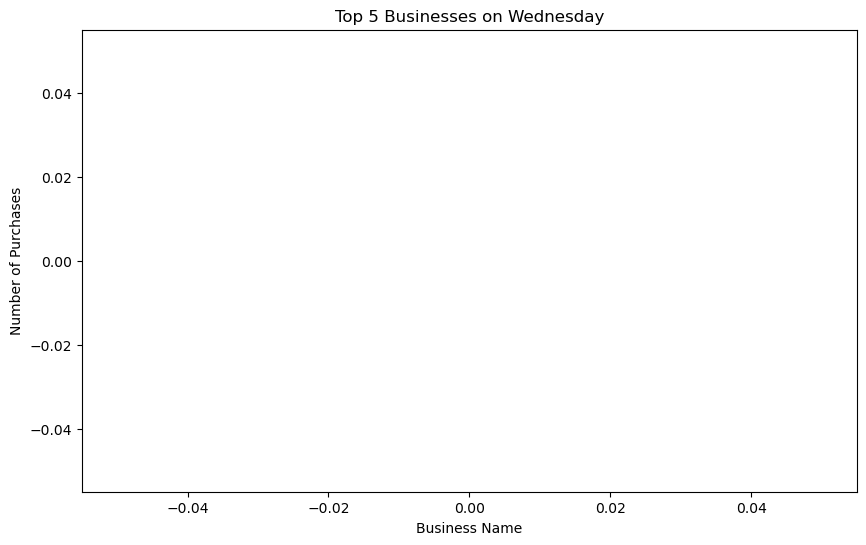

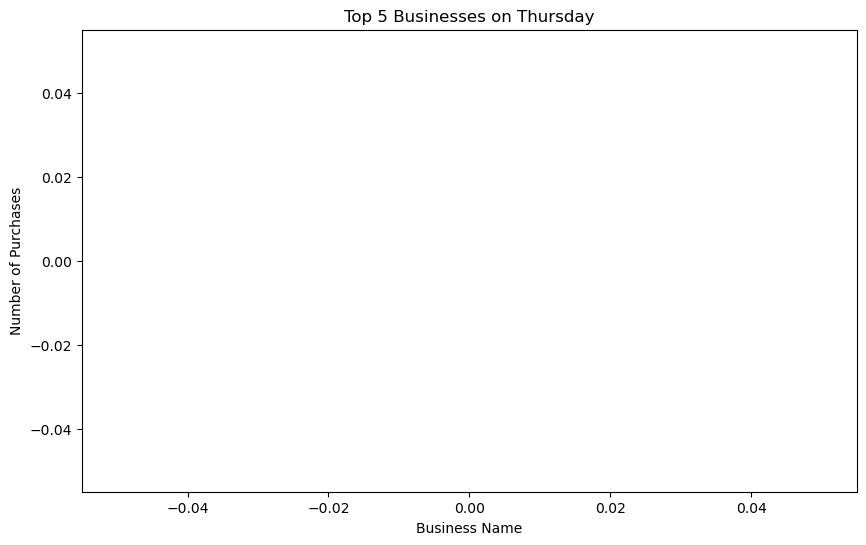

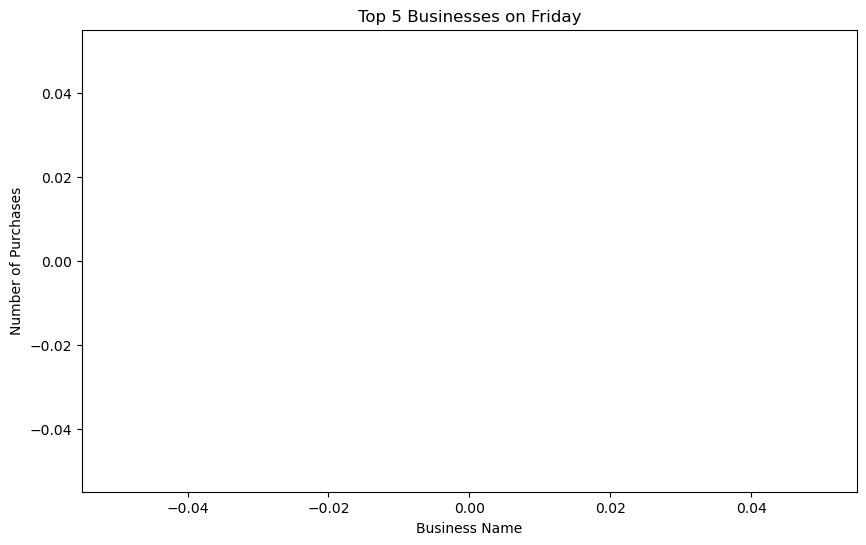

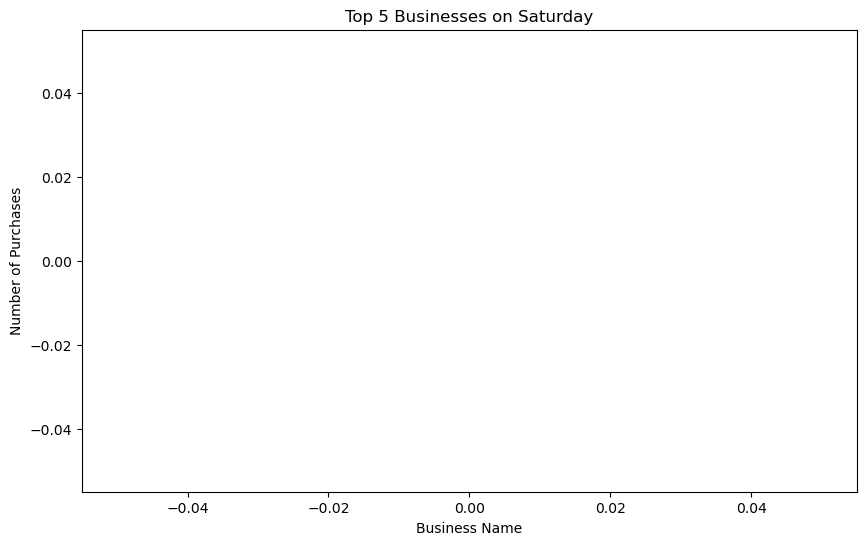

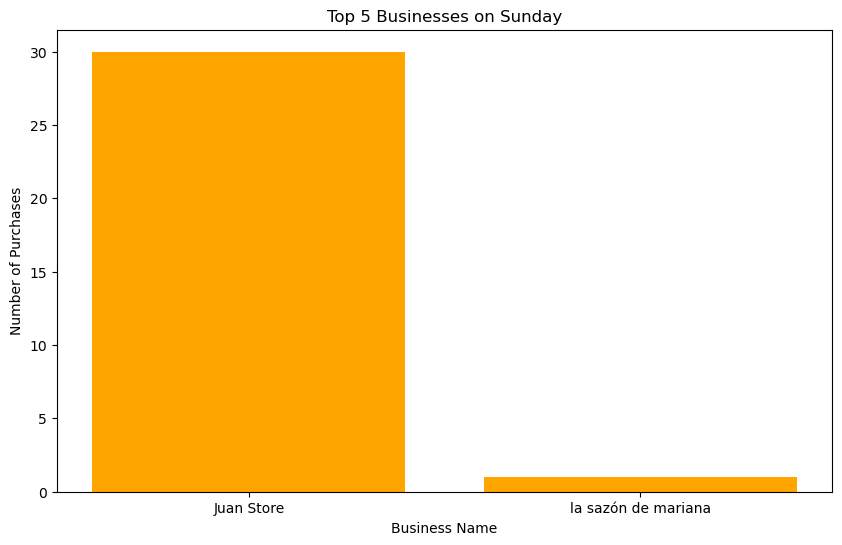

In [12]:
#Visualize insights

# Graph 1: Distribution of purchases for last week
days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
purchase_counts = [len(daywise_purchases[day]) for day in range(7)]

plt.figure(figsize=(10, 6))
plt.bar(days, purchase_counts, color='skyblue')
plt.title("Distribution of Purchases Last Week")
plt.xlabel("Day of the Week")
plt.ylabel("Number of Purchases")
plt.show()

# Graph 2: Distribution of purchases by store category
categories = list(category_purchases.keys())
category_counts = list(category_purchases.values())

plt.figure(figsize=(10, 6))
plt.bar(categories, category_counts, color='green')
plt.title("Distribution of Purchases by Store Category")
plt.xlabel("Store Category")
plt.ylabel("Number of Purchases")
plt.show()

# Graph 3: Top 5 businesses of each day
for day in range(7):
    top_businesses = sorted(top_businesses_per_day[day].items(), key=lambda x: x[1], reverse=True)[:5]
    business_names = [stores[store_id]['name'] for store_id, _ in top_businesses]
    business_counts = [count for _, count in top_businesses]

    plt.figure(figsize=(10, 6))
    plt.bar(business_names, business_counts, color='orange')
    plt.title(f"Top 5 Businesses on {days[day]}")
    plt.xlabel("Business Name")
    plt.ylabel("Number of Purchases")
    plt.show()